### Types of Restuarants around the Perth Metropolitan Area

In [1]:
#dependencies et al.
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
import numpy as np
import scipy.stats as st
import time


In [2]:
# Bring in Summary Dataframe "socio_demographic_restuarant_data.csv"
load_csv = "../Outputs/socio_demographic_restaurant_data.csv"
summary_df = pd.read_csv(load_csv)

# Drop N/A
summary_df = summary_df.dropna()

summary_df.head()

,Postcode,Suburb,Suburb sqkm,Median House Price,Median Age (Persons),Median Mortgage Repayments (Monthly),Median Total Personal Income (Weekly),Median Rent (Weekly),Median Total Family Income (Weekly),Average Number of Persons per Bedroom,...,Number of restaurants,Minimum Rating,Maximum Rating,Average Rating of restaurants,Total Number of Reviews,Average Number of Reviews,Minimum Price Level,Maximum Price Level,Average Price Level,Restaurant Density
0,6064,Alexander Heights,3.1816,453285,37,1800,625,390,1704,0.8,...,24.0,3.4,4.8,4.179167,4189.0,174.541667,1.0,2.0,0.708333,7.543374
1,6154,Alfred Cove,1.0566,840087,39,2420,852,443,2542,0.8,...,54.0,0.0,5.0,4.268519,12506.0,231.592593,1.0,2.0,1.185185,51.107325
2,6038,Alkimos,17.1744,413750,28,2249,930,360,2094,0.7,...,6.0,3.3,4.6,4.133333,1354.0,225.666667,2.0,2.0,0.666667,0.349357
3,6167,Anketell,6.8220,1008763,45,1733,641,420,1958,0.8,...,60.0,3.5,4.6,4.126667,19010.0,316.833333,1.0,2.0,1.416667,8.795075
4,6153,Applecross,3.1954,1376690,43,2916,954,460,2764,0.7,...,60.0,3.5,4.8,4.305000,17894.0,298.233333,1.0,3.0,1.350000,18.776992


In [3]:
# Check the list of Column
list(summary_df.columns.values)

['Postcode',
 'Suburb',
 'Suburb sqkm',
 'Median House Price',
 'Median Age (Persons)',
 'Median Mortgage Repayments (Monthly)',
 'Median Total Personal Income (Weekly)',
 'Median Rent (Weekly)',
 'Median Total Family Income (Weekly)',
 'Average Number of Persons per Bedroom',
 'Median Total Household Income (Weekly)',
 'Average Household Size',
 'People (0-14 year)',
 'People (15-24 year)',
 'People (25-34 year)',
 'People (35-44 year)',
 'People (45-54 year)',
 'People (55-64 year)',
 'People (65-74 year)',
 'People (75-84 year)',
 'People (85 and over year)',
 'Total Number of People',
 'Unemployment Rate (%)',
 'Number of restaurants',
 'Minimum Rating',
 'Maximum Rating',
 'Average Rating of restaurants',
 'Total Number of Reviews',
 'Average Number of Reviews',
 'Minimum Price Level',
 'Maximum Price Level',
 'Average Price Level',
 'Restaurant Density']

-0.0727891545427046
The r-value is: -0.07.


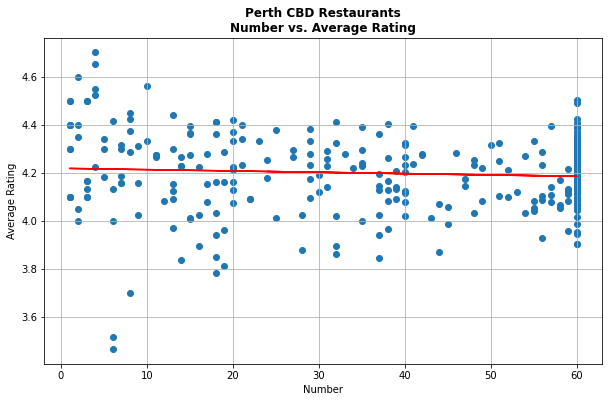

In [4]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Number of restaurants"], summary_df["Average Rating of restaurants"])
regress_values = summary_df["Number of restaurants"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
print(rvalue)

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Number of restaurants"], summary_df["Average Rating of restaurants"])
plt.plot(summary_df["Number of restaurants"], regress_values, "r-")
# plt.annotate(line_eq,(30,3.6),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nNumber vs. Average Rating", fontweight="bold")
plt.xlabel("Number")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/num_restaurant_vs_mean_rating_rev.1.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
# plt.show()

The r-value is: 0.15.


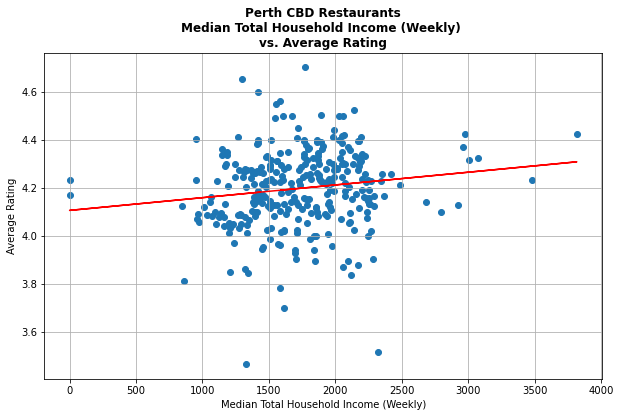

In [5]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Total Household Income (Weekly)"], summary_df["Average Rating of restaurants"])
regress_values = summary_df["Median Total Household Income (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Total Household Income (Weekly)"], summary_df["Average Rating of restaurants"])
plt.plot(summary_df["Median Total Household Income (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Total Household Income (Weekly) \nvs. Average Rating", fontweight="bold")
plt.xlabel("Median Total Household Income (Weekly)")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_mean_rating_rev.1.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: -0.09.


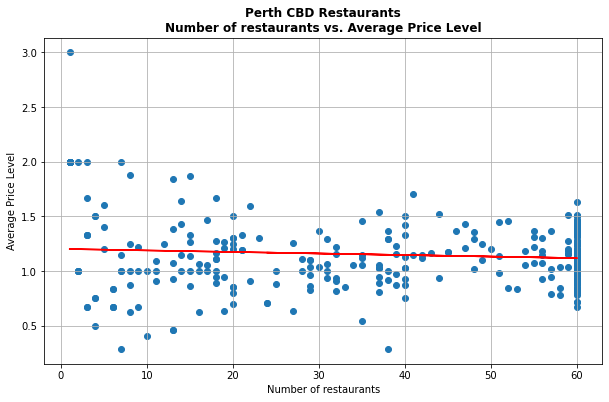

In [6]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Number of restaurants"], summary_df["Average Price Level"])
regress_values = summary_df["Number of restaurants"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Number of restaurants"], summary_df["Average Price Level"])
plt.plot(summary_df["Number of restaurants"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nNumber of restaurants vs. Average Price Level", fontweight="bold")
plt.xlabel("Number of restaurants")
plt.ylabel("Average Price Level")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_mean_price_level_rev.1.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.21.


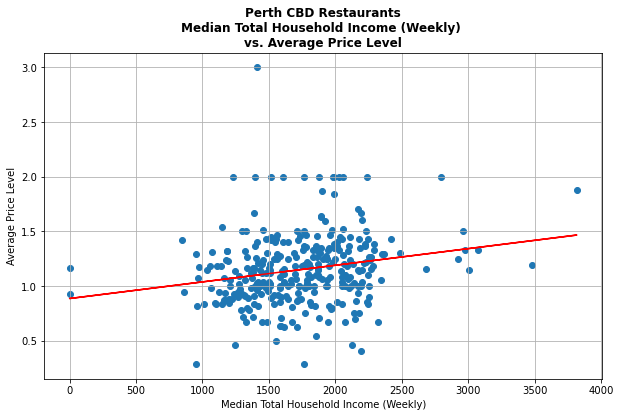

In [7]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Total Household Income (Weekly)"], summary_df["Average Price Level"])
regress_values = summary_df["Median Total Household Income (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Total Household Income (Weekly)"], summary_df["Average Price Level"])
plt.plot(summary_df["Median Total Household Income (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Total Household Income (Weekly) \nvs. Average Price Level", fontweight="bold")
plt.xlabel("Median Total Household Income (Weekly)")
plt.ylabel("Average Price Level")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_mean_price_level_rev.1.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.11.


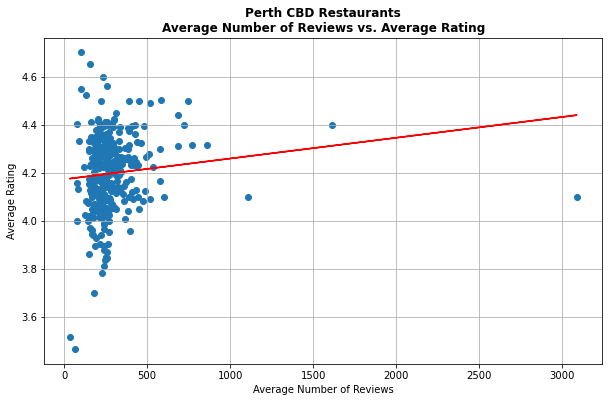

In [8]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Average Number of Reviews"], summary_df["Average Rating of restaurants"])
regress_values = summary_df["Average Number of Reviews"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Average Number of Reviews"], summary_df["Average Rating of restaurants"])
plt.plot(summary_df["Average Number of Reviews"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nAverage Number of Reviews vs. Average Rating", fontweight="bold")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/mean_num_review_vs_mean_rating_01_rev.1.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

36
478
472.94545454545454
The r-value is: 0.12.


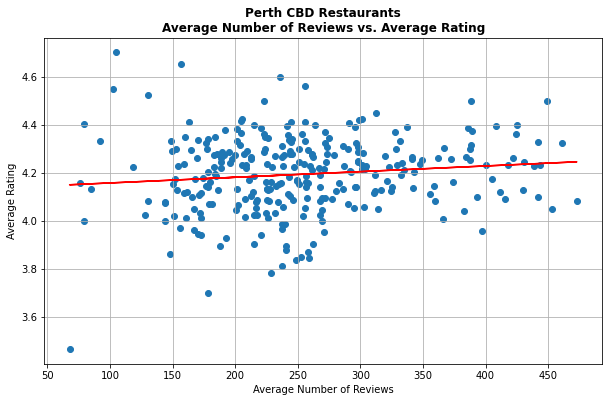

In [9]:
# Removing Outliers
rev_data = summary_df["Average Number of Reviews"]
rev_quartiles = rev_data.quantile([.25,.5,.75])
rev_lowerq = rev_quartiles[0.25]
rev_upperq = rev_quartiles[0.75]
rev_iqr = rev_upperq-rev_lowerq
rev_lower_bound = rev_lowerq - (1.5*rev_iqr)
rev_upper_bound = rev_upperq + (1.5*rev_iqr)

# print(rev_lower_bound)
# print(rev_upper_bound)

rev_min = int(rev_lower_bound.round())
rev_max = int(rev_upper_bound.round())

print(rev_min) # 36
print(rev_max) # 478


# Delete Data (Average Number of Reviews < 36 or > 478)
summary_df_rev = summary_df.drop(summary_df[summary_df["Average Number of Reviews"] < 36].index)
summary_df_rev = summary_df_rev.drop(summary_df_rev[summary_df_rev["Average Number of Reviews"] > 478].index)

# summary_df_rev.head()
print(summary_df_rev["Average Number of Reviews"].max())

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df_rev["Average Number of Reviews"], summary_df_rev["Average Rating of restaurants"])
regress_values = summary_df_rev["Average Number of Reviews"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df_rev["Average Number of Reviews"], summary_df_rev["Average Rating of restaurants"])
plt.plot(summary_df_rev["Average Number of Reviews"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nAverage Number of Reviews vs. Average Rating", fontweight="bold")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/mean_num_review_vs_mean_rating_02_rev.1.png")
# plt.figure((figsize=(10,6))
            
# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.23.


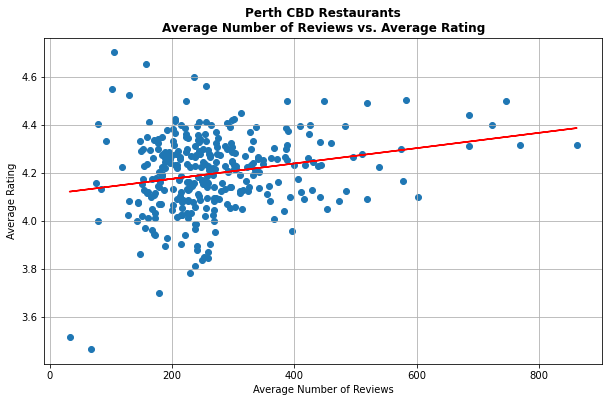

In [10]:
# Delete Data (Average Number of Reviews  > 1000)
summary_df_rev = summary_df.drop(summary_df[summary_df["Average Number of Reviews"] > 1000 ].index)


# summary_df_rev.head()
# print(summary_df_rev["Average Number of Reviews"].max())

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df_rev["Average Number of Reviews"], summary_df_rev["Average Rating of restaurants"])
regress_values = summary_df_rev["Average Number of Reviews"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df_rev["Average Number of Reviews"], summary_df_rev["Average Rating of restaurants"])
plt.plot(summary_df_rev["Average Number of Reviews"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nAverage Number of Reviews vs. Average Rating", fontweight="bold")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/mean_num_review_vs_mean_rating_03_rev.1.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: -0.2.


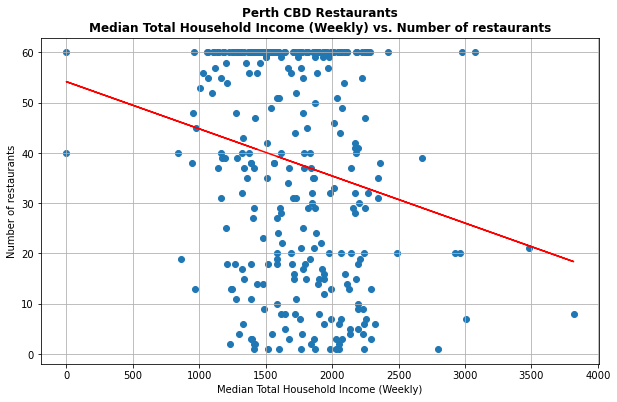

In [11]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Total Household Income (Weekly)"], summary_df["Number of restaurants"])
regress_values = summary_df["Median Total Household Income (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Total Household Income (Weekly)"], summary_df["Number of restaurants"])
plt.plot(summary_df["Median Total Household Income (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Total Household Income (Weekly) vs. Number of restaurants", fontweight="bold")
plt.xlabel("Median Total Household Income (Weekly)")
plt.ylabel("Number of restaurants")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_num_restaurant_rev.1.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.01.


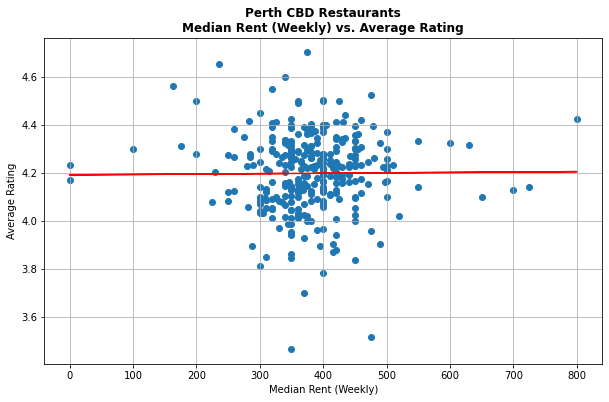

In [12]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Rent (Weekly)"], summary_df["Average Rating of restaurants"])
regress_values = summary_df["Median Rent (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Rent (Weekly)"], summary_df["Average Rating of restaurants"])
plt.plot(summary_df["Median Rent (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Rent (Weekly) vs. Average Rating", fontweight="bold")
plt.xlabel("Median Rent (Weekly)")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/mean_rent_vs_mean_rating_rev.1.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.73.


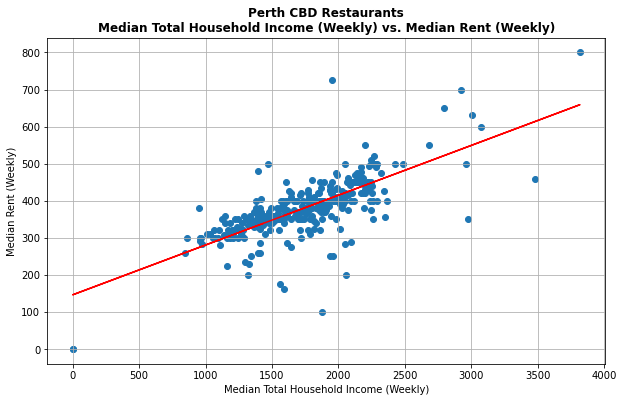

In [13]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Total Household Income (Weekly)"], summary_df["Median Rent (Weekly)"])
regress_values = summary_df["Median Total Household Income (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Median Total Household Income (Weekly)"], summary_df["Median Rent (Weekly)"])
plt.plot(summary_df["Median Total Household Income (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Total Household Income (Weekly) vs. Median Rent (Weekly)", fontweight="bold")
plt.xlabel("Median Total Household Income (Weekly)")
plt.ylabel("Median Rent (Weekly)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_median_rent_rev.1.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.08.


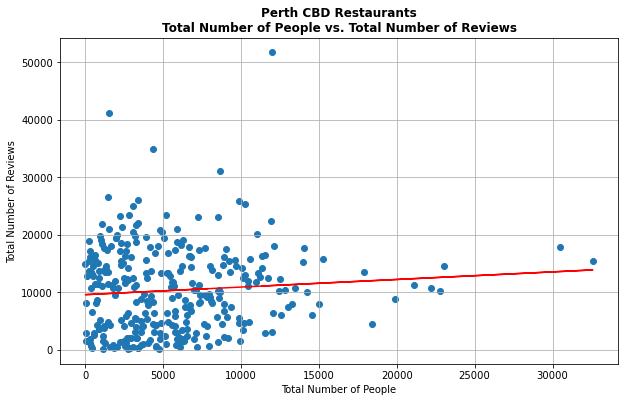

In [14]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Total Number of People"], summary_df["Total Number of Reviews"])
regress_values = summary_df["Total Number of People"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(summary_df["Total Number of People"], summary_df["Total Number of Reviews"])
plt.plot(summary_df["Total Number of People"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nTotal Number of People vs. Total Number of Reviews", fontweight="bold")
plt.xlabel("Total Number of People")
plt.ylabel("Total Number of Reviews")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/num_people_vs_num_review_rev.1.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()